In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving print_shop_orders.csv to print_shop_orders.csv


In [ ]:
df = pd.read_csv('print_shop_orders.csv')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16
...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      1000 non-null   object 
 1   CustomerID   1000 non-null   object 
 2   OrderDate    1000 non-null   object 
 3   ProductType  1000 non-null   object 
 4   OrderValue   1000 non-null   float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
df.head()

,OrderID,CustomerID,OrderDate,ProductType,OrderValue
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16


In [ ]:
df.tail()

,OrderID,CustomerID,OrderDate,ProductType,OrderValue
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43
999,ORDER01000,CUST0011,2025-09-28 08:13:55.805318,Flyer,11.94


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      1000 non-null   object        
 1   CustomerID   1000 non-null   object        
 2   OrderDate    1000 non-null   datetime64[ns]
 3   ProductType  1000 non-null   object        
 4   OrderValue   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
df_summary = df.groupby('CustomerID')['OrderDate'].max().reset_index(name='Max_of_OrderDate')

# Langkah 2: Gabungkan (merge) hasil ke DataFrame asli
df = df.merge(df_summary, on='CustomerID', how='left')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318
...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318


In [ ]:
from datetime import datetime

# Asumsikan 'df' adalah DataFrame Anda dan sudah memiliki kolom 'Max_of_OrderDate'

# --- 1. Tentukan Tanggal Referensi ---
# Gunakan tanggal hari ini (atau satu hari setelah transaksi terakhir di dataset, jika data Anda lama)
reference_date = pd.to_datetime(datetime.now().date())
# Jika Anda ingin menggunakan tanggal fiktif (misalnya, sehari setelah transaksi terbaru):
# TANGGAL_REFERENSI = df['Max_of_OrderDate'].max() + pd.Timedelta(days=1)


# --- 2. Hitung Selisih Hari (Recency) ---
df['Recency'] = (reference_date - df['Max_of_OrderDate']).dt.days
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51
...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21


In [ ]:
df_summary = df.groupby('CustomerID')['OrderID'].count().reset_index(name='Frequency')

# Langkah 2: Gabungkan (merge) hasil ke DataFrame asli
df = df.merge(df_summary, on='CustomerID', how='left')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6
...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4


In [ ]:
df_summary = df.groupby('CustomerID')['OrderValue'].sum().reset_index(name='Monetary')

# Langkah 2: Gabungkan (merge) hasil ke DataFrame asli
df = df.merge(df_summary, on='CustomerID', how='left')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89
...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02


In [ ]:
# 1. Tentukan jumlah kuantil yang diinginkan (5 kelompok, atau quintile)
NUM_QUANTILES = 5

# 2. Definisikan label skor.
# Penting: Karena nilai Recency yang KECIL (baru) harus mendapat skor TINGGI (5),
# kita menggunakan urutan skor terbalik: [5, 4, 3, 2, 1]
labels = [5, 4, 3, 2, 1]

# 3. Hitung skor Recency menggunakan qcut
# qcut secara otomatis membagi data menjadi N kelompok dengan jumlah observasi yang sama.
df['R_Score'] = pd.qcut(df['Recency'], q=NUM_QUANTILES, labels=labels, duplicates='drop') # Gunakan ini jika ada terlalu banyak nilai yang sama yang menyebabkan error
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary,R_Score
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36,1
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61,5
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12,2
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17,4
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89,4
...,...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49,1
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97,5
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41,3
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02,5


In [ ]:
# 1. Tentukan jumlah kuantil
NUM_QUANTILES = 5

# 2. Definisikan label skor.
# Perbaikan: Untuk Frequency, nilai BESAR (sering belanja) harus mendapat skor TINGGI (5).
# Gunakan urutan normal: [1, 2, 3, 4, 5]
frequency_labels = [1, 2, 3, 4, 5]

# 3. Hitung skor Frequency menggunakan qcut
df['F_Score'] = pd.qcut(df['Frequency'], q=NUM_QUANTILES, labels=frequency_labels, duplicates='drop')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary,R_Score,F_Score
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36,1,1
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61,5,5
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12,2,3
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17,4,2
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89,4,4
...,...,...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49,1,1
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97,5,5
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41,3,4
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02,5,2


In [ ]:
# 1. Tentukan jumlah kuantil
NUM_QUANTILES = 5

# 2. Definisikan label skor.
# Perbaikan: Untuk Frequency, nilai BESAR (sering belanja) harus mendapat skor TINGGI (5).
# Gunakan urutan normal: [1, 2, 3, 4, 5]
monetary_labels = [1, 2, 3, 4, 5]

# 3. Hitung skor Frequency menggunakan qcut
df['M_Score'] = pd.qcut(df['Monetary'], q=NUM_QUANTILES, labels=monetary_labels, duplicates='drop')
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36,1,1,3
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61,5,5,4
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12,2,3,5
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17,4,2,1
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49,1,1,4
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97,5,5,5
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41,3,4,5
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02,5,2,3


In [ ]:
df['R_Score'] = df['R_Score'].astype(int)
df['F_Score'] = df['F_Score'].astype(int)
df['M_Score'] = df['M_Score'].astype(int)

# Menjumlahkan ketiga skor untuk mendapatkan Skor RFM total
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36,1,1,3,5
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61,5,5,4,14
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12,2,3,5,10
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17,4,2,1,7
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89,4,4,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49,1,1,4,6
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97,5,5,5,15
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41,3,4,5,12
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02,5,2,3,10


In [ ]:
# 1. Definisikan Batasan (Bins)
# Batas harus mencakup seluruh rentang skor (min 3, max 15) dan titik potong Anda.
# Titik potong (Thresholds): 13, 10, 7, 4
bins = [0, 4, 7, 10, 13, 16]
# Penjelasan bins:
# [0, 4) -> (Skor > 0 dan <= 3, karena 4 tidak termasuk)
# [4, 7) -> (Skor 4, 5, 6)
# [7, 10) -> (Skor 7, 8, 9)
# [10, 13) -> (Skor 10, 11, 12)
# [13, 16] -> (Skor 13, 14, 15)

# 2. Definisikan Label Kategori
# Urutan label harus sesuai dengan urutan bins dari kecil ke besar.
labels = [
    "At Risk",              # Skor 3 ke bawah
    "Need Attention",       # Skor 4-6
    "Potential Loyal Customers", # Skor 7-9
    "Loyal Customers",      # Skor 10-12
    "Best Customers"        # Skor 13-15
]

# 3. Terapkan pd.cut()
df['RFM_Category'] = pd.cut(df['RFM_Score'], bins=bins, labels=labels, right=False) # right=False berarti interval bersifat [a, b), jadi batas bawah (a) termasuk, batas atas (b) tidak termasuk.
df

,OrderID,CustomerID,OrderDate,ProductType,OrderValue,Max_of_OrderDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Category
0,ORDER00001,CUST0259,2025-02-10 08:13:55.805318,Canvas Print,45.41,2025-02-25 08:13:55.805318,259,2,59.36,1,1,3,5,Need Attention
1,ORDER00002,CUST0161,2025-10-14 08:13:55.805318,Poster,13.71,2025-10-14 08:13:55.805318,28,8,103.61,5,5,4,14,Best Customers
2,ORDER00003,CUST0178,2025-07-28 08:13:55.805318,Business Card,11.66,2025-07-28 08:13:55.805318,106,5,114.12,2,3,5,10,Loyal Customers
3,ORDER00004,CUST0010,2025-02-14 08:13:55.805318,Flyer,9.07,2025-10-06 08:13:55.805318,36,4,35.17,4,2,1,7,Potential Loyal Customers
4,ORDER00005,CUST0261,2025-01-10 08:13:55.805318,Flyer,11.16,2025-09-21 08:13:55.805318,51,6,60.89,4,4,3,11,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORDER00996,CUST0150,2024-12-07 08:13:55.805318,Flyer,9.07,2025-02-26 08:13:55.805318,258,3,90.49,1,1,4,6,Need Attention
996,ORDER00997,CUST0293,2025-08-19 08:13:55.805318,Business Card,11.21,2025-10-14 08:13:55.805318,28,12,190.97,5,5,5,15,Best Customers
997,ORDER00998,CUST0143,2025-03-18 08:13:55.805318,Business Card,13.20,2025-09-11 08:13:55.805318,61,6,170.41,3,4,5,12,Loyal Customers
998,ORDER00999,CUST0160,2025-10-21 08:13:55.805318,Poster,15.43,2025-10-21 08:13:55.805318,21,4,59.02,5,2,3,10,Loyal Customers


In [ ]:
df_1 = df.groupby('RFM_Category').count()['CustomerID']
print(df_1)

RFM_Category
At Risk                       65
Need Attention               252
Potential Loyal Customers    284
Loyal Customers              262
Best Customers               137
Name: CustomerID, dtype: int64


/tmp/ipython-input-858515665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_1 = df.groupby('RFM_Category').count()['CustomerID']


/tmp/ipython-input-1863479675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RFM_Category').count()['CustomerID'].plot(kind='bar')


Text(0.5, 1.0, 'RFM Customer')

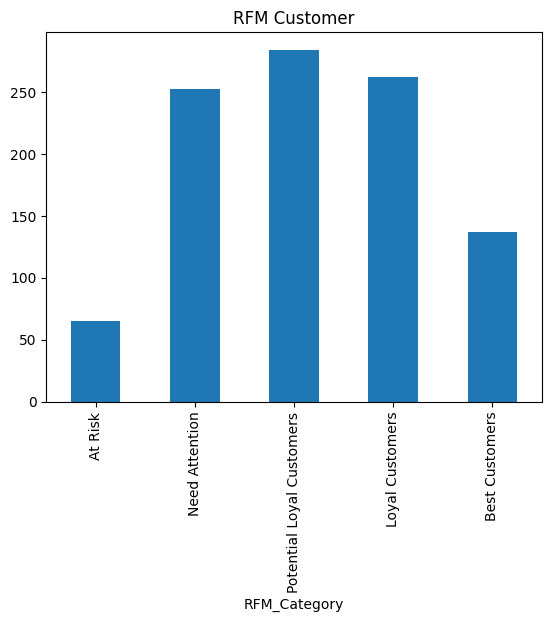

In [ ]:
df.groupby('RFM_Category').count()['CustomerID'].plot(kind='bar')
plt.title('RFM Customer')

Findings:

1. Potential Loyal Customers	28,4%	Customers with moderate scores, recently active.
2. Loyal Customers	26,2%	Your core customers who frequently purchase.
3. Need Attention	25,2%	Active customers, but their frequency and/or monetary value might be declining.
4. Best Customers	13,7%	Your most valuable and most active customers.
5. At Risk	65	6,5%	Customers who haven't purchased for a long time and are at high risk of churning.

Insight:
1. Maximize Potential (28.4% & 25.2%): Focus on converting Potential Loyal and recovering Need Attention customers. Implement targeted cross-selling and upselling campaigns to boost their Frequency (F) and Monetary (M) scores.

2. Reward & Retain (13.7%): Best Customers are your key assets. Maintain their loyalty with exclusive VIP treatment and early access to products, focusing on non-monetary rewards over heavy discounting.

3. Reactivate Urgently (6.5%): The At Risk segment requires an immediate re-engagement campaign. Use strong incentives (high discounts or special product offers) to trigger a repurchase and prevent churn.